# Librairie tableaux, statistiques et data science : pandas

> pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

In [ ]:
# On importe le module principal du package et on affiche la version de pandas
import pandas as pd
print(pd.__version__)

In [ ]:
# On affiche l'aide
?pd

## Nouveaux types d'objets fournis par pandas

Pandas fourni principalement le type (classe) d'objet `DataFrame`.

In [ ]:
# On créé un DataFrame vide qu'on enregistre dans la variable df, puis on l'affiche
df = pd.DataFrame()
print(df)

On peux créer un DataFrame à partir d'un dictionnaire existant. Les clés du dictionnaire doivent correspondre aux colonnes, et les valeurs aux lignes.

In [ ]:
inventaire_arbres = {
    'espece': ['chêne', 'charme', 'hêtre', 'cocotier'],
    'nombre': [15, 24, 2, 0]
}

df_arbres = pd.DataFrame(inventaire_arbres)
print(df_arbres)

La [pandas cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) résume beaucoup de méthodes et à avoir toujours sous la main.

Par exemple, pour ajouter des lignes à un DataFrame :

In [ ]:
inventaire_nouveaux_arbres = {
    'espece': ['pommier', 'poirier', 'bananier', 'manguier'],
    'nombre': [15, 24, 54, 26]
}

# En réalité, on va concaténer deux DataFrames ayant les mêmes colonnes
df_nouveaux_arbres = pd.DataFrame(inventaire_nouveaux_arbres)
df_arbres = pd.concat([df_arbres, df_nouveaux_arbres])

print(df_arbres)

Notez qu'après une concaténation, les index pandas ne sont plus uniques, contrairement aux index Python qui le sont toujours.

In [ ]:
print(df_arbres.loc[1])
print('---')
print(df_arbres.iloc[1])

On peux reset les index pandas. Une colonne index sera alors créée pour conserver les anciens index.

In [ ]:
df_arbres.reset_index(inplace = True)
print(df_arbres)

> ✍️ Transformer le dictionnaire ci-dessous en DataFrame pandas.

In [ ]:
infos_personnelles = {
    'id': ['jdupont', 'gabitbol'],
    'nom': ['Dupont', 'Abitbol'],
    'prenom': ['Jean', 'Georges'],
    'age': [37, 71],
}



> ✍️ Ajouter une personne à ce tableau en utilisant la fonction concat(). Faire en sorte que les index soient uniques pour chaque ligne.

Les tableaux pandas sont dits "tidy". Exemple :

In [ ]:
# Faire référence à une colonne
df_arbres['espece']

In [ ]:
# Multiplier 2 colonnes
print(df_arbres['index'] * df_arbres['nombre'])

Pour supprimer une colonne dont on n'a plus besoin :

In [ ]:
df_arbres.drop(columns=['index'], inplace = True)
print(df_arbres)

Pour résumer des variables selon un champ catégoriel :

In [ ]:
# Rajoutons quelques lignes à notre tableau
df_arbres = pd.concat([
    df_arbres, 
    pd.DataFrame({
    'espece': ['chêne', 'charme', 'hêtre', 'cocotier'],
    'nombre': [15, 24, 2, 0]
    })
])

print(df_arbres)

In [ ]:
# Résumons en faisant une somme par catégorie
somme_arbres = df_arbres.groupby('espece').sum()
print(somme_arbres)

En faisant cela, l'index pandas est devenu une chaine de caractère correspondant au nom du groupe au moment du `groupby`.

In [ ]:
somme_arbres.index

In [ ]:
somme_arbres.loc['charme']

Pour réaliser des graphiques, on peux utiliser matplotlib via une méthode des DataFrames pandas :

In [ ]:
df_arbres.plot.bar(x='espece', title='Nombre d\'especes')

In [ ]:
# Avec des lignes dupliquées
mon_histo = df_arbres.plot.bar(x='espece', y='nombre', title='Nombre d\'individus recensés par espèce')

In [ ]:
# Avec le résumé statistique
mon_histo = somme_arbres.sort_values('nombre', ascending=False).plot.bar(y='nombre', title='Nombre d\'individus recensés par espèce')

## Lire et écrire dans des fichiers avec pandas

Pandas peut générer des tableaux de données directement depuis des fichiers : par exemple csv, presse-papier, excel, sql, json, xml, ...

In [ ]:
df_iris = pd.read_csv('datasets/iris.csv', sep=',', encoding='UTF-8')
print(df_iris)

La sauvegarde d'un tableau de données dans un fichier est également extrêmement simple.

In [45]:
df_arbres.to_csv('datasets/output/inventaire.csv', sep=',')

## Visualiser des données avec pandas
### Table

Les tableaux pandas s'intègrent bien dans les Jupyter notebook si on enlève la fonction `print()`.

In [ ]:
df_iris

Les méthodes head et tail permettent de récupérer les premières et dernières lignes.

In [ ]:
df_iris.head(15)

In [ ]:
df_iris.tail(15)

On accède aux lignes via leur index grâce à la propriété `.loc[]`

In [ ]:
df_iris.loc[30:40]

In [ ]:
somme_arbres

In [ ]:
# Cela fonctionne aussi avec les index de type str
somme_arbres.loc['charme':'poirier']

On peux filtrer les lignes de cette façon :

In [ ]:
df_iris[df_iris['Petal.Length'] > 5]

### Charts

Voici quelques possibilités simples de plot avec pandas. Ces fonctionnalités sont utiles pour visualiser l'état de vos données en cours de traitement, mais je conseille plutôt d'utiliser R et ggplot pour réaliser vos graphiques pour vos rapports et publications.

Toutes les possibilités de plotting de pandas sont [détaillées ici](https://pandas.pydata.org/docs/user_guide/visualization.html) et [là](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas-dataframe-plot).

In [ ]:
df_iris.plot.scatter(x='Sepal.Length', y='Sepal.Width')

In [ ]:
df_iris[df_iris.Species == "virginica"].plot.scatter(x='Sepal.Length', y='Sepal.Width')

> ✍️ Ouvrir le dataset iris.csv dans un DataFrame. Tracer des boxplot pour une des variables à l'aide de la méthode de DataFrame `.boxplot()`. Utilisez l'aide pour trouver les arguments dont vous avez besoin pour choisir la variable à afficher et la variable catégorielle.

> ✍️ Calculer les moyennes de toutes les variables par espèce et tracer le résultat sur un graphique.

> ✍️ Enregistrer le DataFrame des moyennes dans un fichier csv.

## Récupérer des données via une API

Pour récupérer des données directement depuis une API, on va utiliser le package requests. Par exemple, l'[API des stations Velo'V](https://transport.data.gouv.fr/datasets/velos-libre-service-lyon-velov-disponibilite-en-temps-reel).

In [ ]:
# On importe tout le package requests
import requests

# On récupère les informations temps réel sur les stations Velo'V
reponse = requests.get('https://transport.data.gouv.fr/gbfs/lyon/station_status.json')

# La fonction get du package requests va renvoyer un objet de type Reponse
print(reponse)

On peux vérifier à quoi correspond le code HTTP de la réponse dans la documentation de l'API. Puis on vérifie ce quelle contient.

In [2]:
print(reponse.status_code)

200


In [ ]:
print(reponse.json())

Pour stocker le contenu de cette réponse dans un DataFrame : 

In [24]:
import pandas as pd

donnees_velov = pd.DataFrame(reponse.json()['data']['stations'])
print(donnees_velov)

     is_installed  is_renting  is_returning  last_reported  \
0               1           1             1     1674593389   
1               1           1             1     1674593762   
2               1           1             1     1674593296   
3               1           1             1     1674593626   
4               1           1             1     1674593820   
..            ...         ...           ...            ...   
426             1           1             1     1674593834   
427             1           1             1     1674593454   
428             1           1             1     1674593526   
429             1           1             1     1674593645   
430             1           1             1     1674593583   

     num_bikes_available  num_docks_available station_id  
0                     14                    8       2010  
1                     17                    2       5015  
2                      8                    9      32001  
3                  

On a récupéré un certain nombre d'informations sur l'état en temps réel des stations. On peux faire un boxplot pour le nombre de vélos actuellement disponibles par station comme ci-desous.

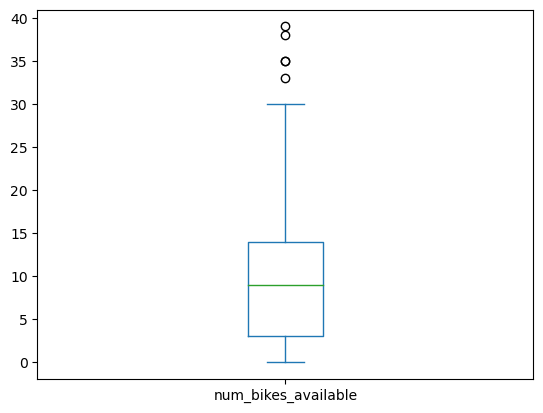

In [16]:
graph_chronique = donnees_velov['num_bikes_available'].plot.box()

Les dates (colonnes `last_reported` dans le DataFrame) sont dans un format particulier : le [timestamp](https://en.wikipedia.org/wiki/Unix_time).

On peux utiliser la méthode `info()` pour vérifier le type d'objet des dates.

In [17]:
print(donnees_velov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   is_installed         431 non-null    int64 
 1   is_renting           431 non-null    int64 
 2   is_returning         431 non-null    int64 
 3   last_reported        431 non-null    int64 
 4   num_bikes_available  431 non-null    int64 
 5   num_docks_available  431 non-null    int64 
 6   station_id           431 non-null    object
dtypes: int64(6), object(1)
memory usage: 23.7+ KB
None


Il existe en Python un type d'objet `datetime` spécialement concu pour les dates, fourni par le package du même nom. Pas besoin de l'importer pour l'utiliser avec pandas car pandas propose des méthodes de plus haut niveau pour effectuer la conversion.

Nous allons l'utiliser pour transformer ces timestamps en dates.

In [25]:
donnees_velov['last_reported'] = pd.to_datetime(donnees_velov['last_reported'], unit='s')
print(donnees_velov.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   is_installed         431 non-null    int64         
 1   is_renting           431 non-null    int64         
 2   is_returning         431 non-null    int64         
 3   last_reported        431 non-null    datetime64[ns]
 4   num_bikes_available  431 non-null    int64         
 5   num_docks_available  431 non-null    int64         
 6   station_id           431 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 23.7+ KB
None


In [33]:
donnees_velov

,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_docks_available,station_id
0,1,1,1,2023-01-24 20:49:49,14,8,2010
1,1,1,1,2023-01-24 20:56:02,17,2,5015
2,1,1,1,2023-01-24 20:48:16,8,9,32001
3,1,1,1,2023-01-24 20:53:46,8,12,6004
4,1,1,1,2023-01-24 20:57:00,22,18,7035
...,...,...,...,...,...,...,...
426,1,1,1,2023-01-24 20:57:14,2,18,8002
427,1,1,1,2023-01-24 20:50:54,10,10,10007
428,1,1,1,2023-01-24 20:52:06,3,37,9033
429,1,1,1,2023-01-24 20:54:05,9,13,5001


In [ ]:
# La méthode describe permet de se rendre compte d'un problème de timezone
donnees_velov['last_reported'].describe()

Pour remettre nos dates sur la bonne timezone :

In [35]:
donnees_velov['last_reported'] = donnees_velov['last_reported'].dt.tz_convert('Europe/Paris')

print(donnees_velov.info())
donnees_velov

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype                       
---  ------               --------------  -----                       
 0   is_installed         431 non-null    int64                       
 1   is_renting           431 non-null    int64                       
 2   is_returning         431 non-null    int64                       
 3   last_reported        431 non-null    datetime64[ns, Europe/Paris]
 4   num_bikes_available  431 non-null    int64                       
 5   num_docks_available  431 non-null    int64                       
 6   station_id           431 non-null    object                      
dtypes: datetime64[ns, Europe/Paris](1), int64(5), object(1)
memory usage: 23.7+ KB
None


,is_installed,is_renting,is_returning,last_reported,num_bikes_available,num_docks_available,station_id
0,1,1,1,2023-01-24 20:49:49+01:00,14,8,2010
1,1,1,1,2023-01-24 20:56:02+01:00,17,2,5015
2,1,1,1,2023-01-24 20:48:16+01:00,8,9,32001
3,1,1,1,2023-01-24 20:53:46+01:00,8,12,6004
4,1,1,1,2023-01-24 20:57:00+01:00,22,18,7035
...,...,...,...,...,...,...,...
426,1,1,1,2023-01-24 20:57:14+01:00,2,18,8002
427,1,1,1,2023-01-24 20:50:54+01:00,10,10,10007
428,1,1,1,2023-01-24 20:52:06+01:00,3,37,9033
429,1,1,1,2023-01-24 20:54:05+01:00,9,13,5001


## Ajouter des géométries spatiales avec geopandas

Le package geopandas ajoute la gestion des géométries spatiales à pandas.

In [84]:
import geopandas as gpd

### Transformer un DataFrame en GeoDataFrame

On va créer un GeoDataFrame avec des géométries spatiales de type point à partir des données latitude et longitude renvoyées par l'API.

In [88]:
gdf_hydro = gpd.GeoDataFrame(donnees_hydro, 
                             crs="EPSG:4326", 
                             geometry=gpd.points_from_xy(donnees_hydro['longitude'], 
                                                         donnees_hydro['latitude']))
print(gdf_hydro.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype                       
---  ------                     --------------  -----                       
 0   code_site                  100 non-null    object                      
 1   code_station               100 non-null    object                      
 2   grandeur_hydro             100 non-null    object                      
 3   date_debut_serie           100 non-null    datetime64[ns, Europe/Paris]
 4   date_fin_serie             100 non-null    datetime64[ns, Europe/Paris]
 5   statut_serie               100 non-null    int64                       
 6   code_systeme_alti_serie    100 non-null    int64                       
 7   date_obs                   100 non-null    datetime64[ns, Europe/Paris]
 8   resultat_obs               100 non-null    float64                     
 9   code_methode_obs           100 non-n

In [94]:
gdf_hydro['geometry']

0     POINT (6.27105 46.15060)
1     POINT (6.27105 46.15060)
2     POINT (6.27105 46.15060)
3     POINT (6.27105 46.15060)
4     POINT (6.27105 46.15060)
                ...           
95    POINT (6.27105 46.15060)
96    POINT (6.27105 46.15060)
97    POINT (6.27105 46.15060)
98    POINT (6.27105 46.15060)
99    POINT (6.27105 46.15060)
Name: geometry, Length: 100, dtype: geometry

### Produire des cartes avec geopandas

On peux utiliser un dataset fourni dans le package geopandas comme fond de carte et utiliser matplotlib pour générer une carte.

In [97]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

(40.0, 52.0)

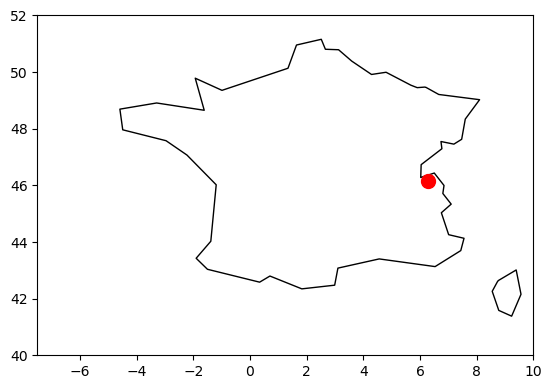

In [102]:
base = world[world['name']=='France'].plot(color='white', edgecolor='black')

gdf_dernieres_mesures = gdf_hydro.groupby('code_station').first()

stations_map = gdf_dernieres_mesures.plot(ax=base, marker='o', color='red', markersize=100)

stations_map.set_xlim(-7.5,10)
stations_map.set_ylim(40,52)

La méthode `explore()` permet de générer rapidement un leaflet. Cette méthode fait appel au package ipyleaflet.

In [108]:
gdf_dernieres_mesures[['resultat_obs', 'geometry']].explore(     
    column="resultat_obs", # Utiliser le champ resultat_obs pour la couleur
    tooltip="code_station", # show "BoroName" value in tooltip (on hover)
    popup=True, # show all values in popup (on click)
    tiles="CartoDB positron", # use "CartoDB positron" tiles
)

/opt/miniconda3/envs/formation-python/lib/python3.10/site-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


### Enregistrer et lire un fchier avec geopandas

On peux enregistrer notre tableau de données spatiales sur le disque (shp, gpkg, sql, ...).

In [114]:
gdf_hydro.to_file('datasets/output/stations.gpkg')
gdf_hydro = None

print(gdf_hydro)

None


Et bien sûr, recharger en mémoire un fichier existant.

In [117]:
gdf_hydro = gpd.read_file('datasets/output/stations.gpkg')
print(gdf_hydro.head())

  code_site code_station grandeur_hydro          date_debut_serie  \
0  V0220002   V022000202              H 2022-11-21 07:00:01+01:00   
1  V0220002   V022000202              H 2022-11-21 07:00:01+01:00   
2  V0220002   V022000202              H 2022-11-21 07:00:01+01:00   
3  V0220002   V022000202              H 2022-11-21 07:00:01+01:00   
4  V0220002   V022000202              H 2022-11-21 07:00:01+01:00   

             date_fin_serie  statut_serie  code_systeme_alti_serie  \
0 2022-11-21 09:30:00+01:00             4                       31   
1 2022-11-21 09:30:00+01:00             4                       31   
2 2022-11-21 09:30:00+01:00             4                       31   
3 2022-11-21 09:30:00+01:00             4                       31   
4 2022-11-21 09:30:00+01:00             4                       31   

                   date_obs  resultat_obs  code_methode_obs  \
0 2022-11-21 09:30:00+01:00         772.0                 0   
1 2022-11-21 09:25:00+01:00         76

### Pour aller plus loin avec geopandas

Geopandas permet de faire énormément de chose que l'on fait classiquement dans un SIG avec des méthodes très simples à utiliser : jointures spatiales, buffer, calculs de distance, etc.

Pour en savoir plus, [rendez-vous dans la doc !](https://geopandas.org/en/stable/getting_started/introduction.html)